In [17]:
# =============================================================================
# IMPORT REQUIRED LIBRARIES
# =============================================================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [22]:
# =============================================================================
# 1. LOAD DATASET
# =============================================================================
# Load the retail dataset from CSV file
try:
    df = pd.read_csv('OnlineRetail.csv', encoding='unicode_escape')
    print("✅ Dataset loaded successfully!")
    print(f"📊 Dataset shape: {df.shape}")
except Exception as e:
    print(f"❌ Error loading dataset: {e}")
    df = None

# Display basic dataset info
if df is not None:
    print(f"\n📈 Dataset Dimensions: {df.shape[0]} rows, {df.shape[1]} columns")
    print("\n🔍 Column Information:")
    print(df.info())
    print("\n🏷️ Column Names:")
    print(df.columns.tolist())

✅ Dataset loaded successfully!
📊 Dataset shape: (541909, 8)

📈 Dataset Dimensions: 541909 rows, 8 columns

🔍 Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None

🏷️ Column Names:
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


In [23]:
# =============================================================================
# 2. DATA DESCRIPTION & BASIC STATISTICS
# =============================================================================
print("=" * 50)
print("📋 DATA DESCRIPTION")
print("=" * 50)

print(f"📊 Basic Statistics:")
print(df.describe())

print("\n❌ Missing Values:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

📋 DATA DESCRIPTION
📊 Basic Statistics:
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

❌ Missing Values:
Description      1454
CustomerID     135080
dtype: int64


In [24]:
# =============================================================================
# 3. DATA PREPROCESSING
# =============================================================================
print("=" * 50)
print("🛠️ DATA PREPROCESSING")
print("=" * 50)

# Create a copy of the dataframe
df_clean = df.copy()

# Remove rows with missing CustomerID
initial_count = len(df_clean)
df_clean = df_clean.dropna(subset=['CustomerID'])
print(f"✅ Removed {initial_count - len(df_clean)} rows with missing CustomerID")

# Remove duplicates
initial_count = len(df_clean)
df_clean = df_clean.drop_duplicates()
print(f"✅ Removed {initial_count - len(df_clean)} duplicate rows")

# Filter out negative quantities and prices
df_clean = df_clean[df_clean['Quantity'] > 0]
df_clean = df_clean[df_clean['UnitPrice'] > 0]

# Create TotalAmount column
df_clean['TotalAmount'] = df_clean['Quantity'] * df_clean['UnitPrice']

# Convert InvoiceDate to datetime
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

# Extract time features
df_clean['InvoiceYear'] = df_clean['InvoiceDate'].dt.year
df_clean['InvoiceMonth'] = df_clean['InvoiceDate'].dt.month
df_clean['InvoiceDay'] = df_clean['InvoiceDate'].dt.day
df_clean['InvoiceHour'] = df_clean['InvoiceDate'].dt.hour

print(f"📊 Cleaned dataset shape: {df_clean.shape}")
print("\n🔍 Cleaned dataset info:")
print(df_clean.info())

🛠️ DATA PREPROCESSING
✅ Removed 135080 rows with missing CustomerID
✅ Removed 5225 duplicate rows
📊 Cleaned dataset shape: (392692, 13)

🔍 Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     392692 non-null  object        
 1   StockCode     392692 non-null  object        
 2   Description   392692 non-null  object        
 3   Quantity      392692 non-null  int64         
 4   InvoiceDate   392692 non-null  datetime64[ns]
 5   UnitPrice     392692 non-null  float64       
 6   CustomerID    392692 non-null  float64       
 7   Country       392692 non-null  object        
 8   TotalAmount   392692 non-null  float64       
 9   InvoiceYear   392692 non-null  int32         
 10  InvoiceMonth  392692 non-null  int32         
 11  InvoiceDay    392692 non-null  int32         
 12  InvoiceHour   

📊 DATA VISUALIZATIONS


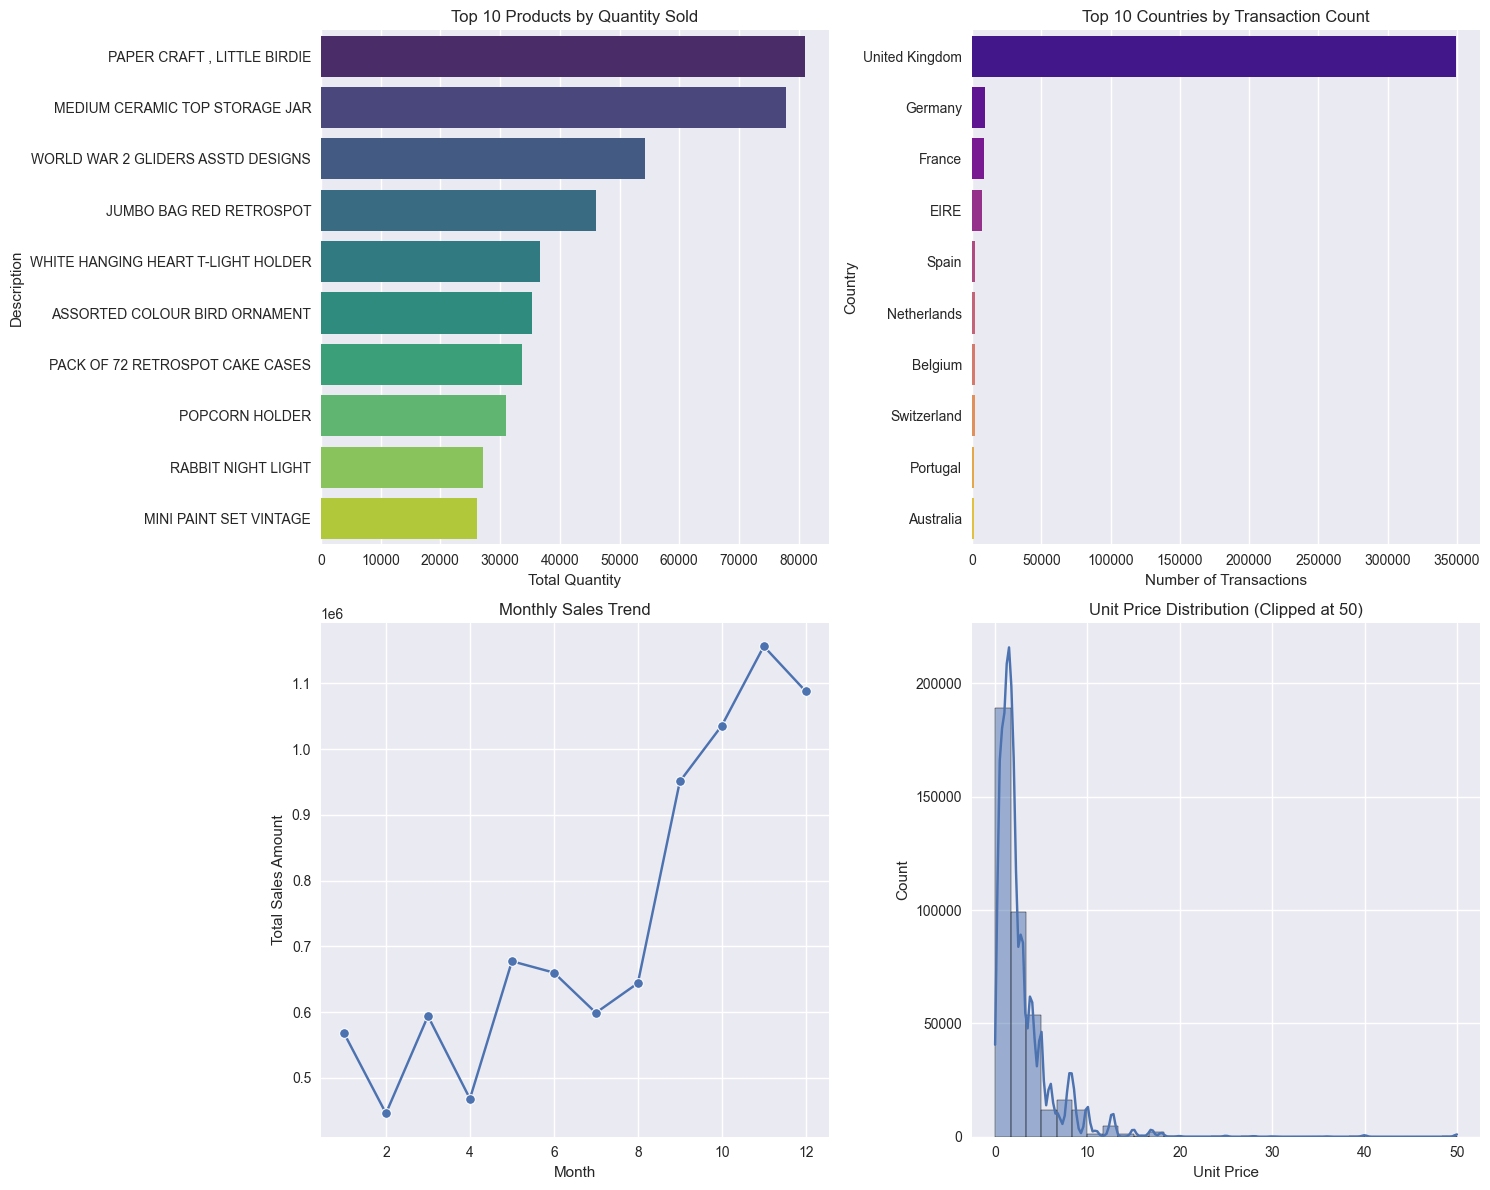

In [25]:
# =============================================================================
# 4. DATA VISUALIZATIONS WITH SEABORN
# =============================================================================
print("=" * 50)
print("📊 DATA VISUALIZATIONS")
print("=" * 50)

# Set up the plotting style
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Top 10 products by quantity sold
top_products = df_clean.groupby('Description')['Quantity'].sum().nlargest(10)
sns.barplot(x=top_products.values, y=top_products.index, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Top 10 Products by Quantity Sold')
axes[0, 0].set_xlabel('Total Quantity')

# 2. Sales distribution by country (top 10)
top_countries = df_clean['Country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, ax=axes[0, 1], palette='plasma')
axes[0, 1].set_title('Top 10 Countries by Transaction Count')
axes[0, 1].set_xlabel('Number of Transactions')

# 3. Monthly sales trend
monthly_sales = df_clean.groupby('InvoiceMonth')['TotalAmount'].sum()
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, ax=axes[1, 0], marker='o')
axes[1, 0].set_title('Monthly Sales Trend')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Total Sales Amount')

# 4. Price distribution
sns.histplot(df_clean['UnitPrice'].clip(0, 50), bins=30, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Unit Price Distribution (Clipped at 50)')
axes[1, 1].set_xlabel('Unit Price')

plt.tight_layout()
plt.show()

In [26]:
# =============================================================================
# 5. PIVOT TABLES ANALYSIS
# =============================================================================
print("=" * 50)
print("📋 PIVOT TABLES ANALYSIS")
print("=" * 50)

# Pivot Table 1: Customer-Product matrix (for collaborative filtering)
print("\n1. Customer-Product Quantity Matrix (Sample):")
customer_product_pivot = pd.pivot_table(
    df_clean,
    values='Quantity',
    index='CustomerID',
    columns='Description',
    aggfunc='sum',
    fill_value=0
)
print(f"   Shape: {customer_product_pivot.shape}")
print(f"   Sample data (first 5x5):")
print(customer_product_pivot.iloc[:5, :5])

# Pivot Table 2: Country-wise product popularity
print("\n2. Country-wise Top Products:")
country_product_pivot = pd.pivot_table(
    df_clean,
    values='Quantity',
    index='Country',
    columns='Description',
    aggfunc='sum',
    fill_value=0
)
print(f"   Shape: {country_product_pivot.shape}")

# Pivot Table 3: Monthly sales by country
print("\n3. Monthly Sales by Country:")
monthly_country_pivot = pd.pivot_table(
    df_clean,
    values='TotalAmount',
    index='InvoiceMonth',
    columns='Country',
    aggfunc='sum',
    fill_value=0
)
print(f"   Shape: {monthly_country_pivot.shape}")

📋 PIVOT TABLES ANALYSIS

1. Customer-Product Quantity Matrix (Sample):
   Shape: (4338, 3866)
   Sample data (first 5x5):
Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
CustomerID                                                        
12346.0                           0                           0   
12347.0                           0                           0   
12348.0                           0                           0   
12349.0                           0                           0   
12350.0                           0                           0   

Description  12 DAISY PEGS IN WOOD BOX  12 EGG HOUSE PAINTED WOOD  \
CustomerID                                                          
12346.0                              0                          0   
12347.0                              0                          0   
12348.0                              0                          0   
12349.0                              0                         

In [27]:
# =============================================================================
# 6. POPULAR ITEMS ANALYSIS
# =============================================================================
print("=" * 50)
print("🏆 POPULAR ITEMS ANALYSIS")
print("=" * 50)

# GLOBALLY POPULAR ITEMS
print("\n🌍 GLOBALLY POPULAR ITEMS:")
global_popular = df_clean.groupby('Description').agg({
    'Quantity': 'sum',
    'CustomerID': 'nunique',
    'TotalAmount': 'sum'
}).nlargest(10, 'Quantity')
global_popular = global_popular.rename(columns={
    'Quantity': 'TotalQuantity',
    'CustomerID': 'UniqueCustomers',
    'TotalAmount': 'TotalRevenue'
})
print(global_popular)

# COUNTRY-WISE POPULAR ITEMS
print("\n🇬🇧 COUNTRY-WISE POPULAR ITEMS (UK - Top 5):")
uk_popular = df_clean[df_clean['Country'] == 'United Kingdom'].groupby('Description').agg({
    'Quantity': 'sum',
    'CustomerID': 'nunique'
}).nlargest(5, 'Quantity')
print(uk_popular)

# MONTH-WISE POPULAR ITEMS
print("\n📅 MONTH-WISE POPULAR ITEMS (Month 11 - Top 5):")
month_popular = df_clean[df_clean['InvoiceMonth'] == 11].groupby('Description').agg({
    'Quantity': 'sum',
    'CustomerID': 'nunique'
}).nlargest(5, 'Quantity')
print(month_popular)

🏆 POPULAR ITEMS ANALYSIS

🌍 GLOBALLY POPULAR ITEMS:
                                    TotalQuantity  UniqueCustomers  \
Description                                                          
PAPER CRAFT , LITTLE BIRDIE                 80995                1   
MEDIUM CERAMIC TOP STORAGE JAR              77916              138   
WORLD WAR 2 GLIDERS ASSTD DESIGNS           54319              307   
JUMBO BAG RED RETROSPOT                     46078              635   
WHITE HANGING HEART T-LIGHT HOLDER          36706              856   
ASSORTED COLOUR BIRD ORNAMENT               35263              678   
PACK OF 72 RETROSPOT CAKE CASES             33670              635   
POPCORN HOLDER                              30919              295   
RABBIT NIGHT LIGHT                          27153              450   
MINI PAINT SET VINTAGE                      26076              213   

                                    TotalRevenue  
Description                                       
PAPER

In [28]:
# =============================================================================
# 6. POPULAR ITEMS ANALYSIS
# =============================================================================
print("=" * 50)
print("🏆 POPULAR ITEMS ANALYSIS")
print("=" * 50)

# GLOBALLY POPULAR ITEMS
print("\n🌍 GLOBALLY POPULAR ITEMS:")
global_popular = df_clean.groupby('Description').agg({
    'Quantity': 'sum',
    'CustomerID': 'nunique',
    'TotalAmount': 'sum'
}).nlargest(10, 'Quantity')
global_popular = global_popular.rename(columns={
    'Quantity': 'TotalQuantity',
    'CustomerID': 'UniqueCustomers',
    'TotalAmount': 'TotalRevenue'
})
print(global_popular)

# COUNTRY-WISE POPULAR ITEMS
print("\n🇬🇧 COUNTRY-WISE POPULAR ITEMS (UK - Top 5):")
uk_popular = df_clean[df_clean['Country'] == 'United Kingdom'].groupby('Description').agg({
    'Quantity': 'sum',
    'CustomerID': 'nunique'
}).nlargest(5, 'Quantity')
print(uk_popular)

# MONTH-WISE POPULAR ITEMS
print("\n📅 MONTH-WISE POPULAR ITEMS (Month 11 - Top 5):")
month_popular = df_clean[df_clean['InvoiceMonth'] == 11].groupby('Description').agg({
    'Quantity': 'sum',
    'CustomerID': 'nunique'
}).nlargest(5, 'Quantity')
print(month_popular)

🏆 POPULAR ITEMS ANALYSIS

🌍 GLOBALLY POPULAR ITEMS:
                                    TotalQuantity  UniqueCustomers  \
Description                                                          
PAPER CRAFT , LITTLE BIRDIE                 80995                1   
MEDIUM CERAMIC TOP STORAGE JAR              77916              138   
WORLD WAR 2 GLIDERS ASSTD DESIGNS           54319              307   
JUMBO BAG RED RETROSPOT                     46078              635   
WHITE HANGING HEART T-LIGHT HOLDER          36706              856   
ASSORTED COLOUR BIRD ORNAMENT               35263              678   
PACK OF 72 RETROSPOT CAKE CASES             33670              635   
POPCORN HOLDER                              30919              295   
RABBIT NIGHT LIGHT                          27153              450   
MINI PAINT SET VINTAGE                      26076              213   

                                    TotalRevenue  
Description                                       
PAPER

In [29]:
# =============================================================================
# 7. RECOMMENDATION SYSTEM - GLOBAL
# =============================================================================
print("=" * 60)
print("🌟 GLOBAL RECOMMENDATIONS")
print("=" * 60)

# Global Recommendations (Most popular items overall)
print("Top 10 Best Sellers Globally:")
global_recs = df_clean.groupby('Description').agg({
    'Quantity': 'sum',
    'CustomerID': 'nunique',
    'TotalAmount': 'sum'
}).nlargest(10, 'Quantity')
print(global_recs[['Quantity', 'CustomerID', 'TotalAmount']].head(10))

print("\n🎁 FINAL GLOBAL RECOMMENDATIONS:")
for i, product in enumerate(global_recs.index.tolist()[:5], 1):
    print(f"   {i}. {product}")

🌟 GLOBAL RECOMMENDATIONS
Top 10 Best Sellers Globally:
                                    Quantity  CustomerID  TotalAmount
Description                                                          
PAPER CRAFT , LITTLE BIRDIE            80995           1    168469.60
MEDIUM CERAMIC TOP STORAGE JAR         77916         138     81416.73
WORLD WAR 2 GLIDERS ASSTD DESIGNS      54319         307     13558.41
JUMBO BAG RED RETROSPOT                46078         635     85040.54
WHITE HANGING HEART T-LIGHT HOLDER     36706         856    100392.10
ASSORTED COLOUR BIRD ORNAMENT          35263         678     56413.03
PACK OF 72 RETROSPOT CAKE CASES        33670         635     16381.88
POPCORN HOLDER                         30919         295     23417.51
RABBIT NIGHT LIGHT                     27153         450     51251.24
MINI PAINT SET VINTAGE                 26076         213     16039.24

🎁 FINAL GLOBAL RECOMMENDATIONS:
   1. PAPER CRAFT , LITTLE BIRDIE
   2. MEDIUM CERAMIC TOP STORAGE JAR
 

In [30]:
# =============================================================================
# 8. RECOMMENDATION SYSTEM - COUNTRY SPECIFIC
# =============================================================================
print("=" * 60)
print("🇺🇸 COUNTRY-SPECIFIC RECOMMENDATIONS")
print("=" * 60)

country = 'United Kingdom'
print(f"Top 5 Best Sellers in {country}:")
country_recs = df_clean[df_clean['Country'] == country].groupby('Description').agg({
    'Quantity': 'sum',
    'CustomerID': 'nunique'
}).nlargest(5, 'Quantity')
print(country_recs)

print(f"\n🎁 FINAL COUNTRY RECOMMENDATIONS for {country}:")
for i, product in enumerate(country_recs.index.tolist()[:5], 1):
    print(f"   {i}. {product}")

🇺🇸 COUNTRY-SPECIFIC RECOMMENDATIONS
Top 5 Best Sellers in United Kingdom:
                                    Quantity  CustomerID
Description                                             
PAPER CRAFT , LITTLE BIRDIE            80995           1
MEDIUM CERAMIC TOP STORAGE JAR         76919         127
WORLD WAR 2 GLIDERS ASSTD DESIGNS      49086         285
JUMBO BAG RED RETROSPOT                41878         562
WHITE HANGING HEART T-LIGHT HOLDER     34630         821

🎁 FINAL COUNTRY RECOMMENDATIONS for United Kingdom:
   1. PAPER CRAFT , LITTLE BIRDIE
   2. MEDIUM CERAMIC TOP STORAGE JAR
   3. WORLD WAR 2 GLIDERS ASSTD DESIGNS
   4. JUMBO BAG RED RETROSPOT
   5. WHITE HANGING HEART T-LIGHT HOLDER


In [31]:
# =============================================================================
# 9. RECOMMENDATION SYSTEM - PERSONALIZED
# =============================================================================
print("=" * 60)
print("👤 PERSONALIZED RECOMMENDATIONS")
print("=" * 60)

# Get a sample customer ID from the dataset
sample_customer = df_clean['CustomerID'].iloc[0] if len(df_clean) > 0 else 17850
print(f"Analyzing recommendations for Customer: {sample_customer}")

# Get customer's purchase history
customer_products = df_clean[df_clean['CustomerID'] == sample_customer]['Description'].unique()
print(f"\n📦 Customer has purchased {len(customer_products)} unique products")

# Find customers who bought similar products
similar_customers = df_clean[df_clean['Description'].isin(customer_products)]['CustomerID'].unique()
print(f"👥 Found {len(similar_customers)} similar customers")

# Get popular products among similar customers (excluding what customer already bought)
customer_recs = df_clean[
    (df_clean['CustomerID'].isin(similar_customers)) &
    (~df_clean['Description'].isin(customer_products))
].groupby('Description').agg({
    'Quantity': 'sum',
    'CustomerID': 'nunique'
}).nlargest(5, 'Quantity')

if not customer_recs.empty:
    print("\n⭐ PERSONALIZED RECOMMENDATIONS:")
    print(customer_recs)

    print("\n🎁 FINAL PERSONALIZED RECOMMENDATIONS:")
    for i, product in enumerate(customer_recs.index.tolist()[:5], 1):
        print(f"   {i}. {product}")
else:
    print("   No personalized recommendations available. Showing global popular items.")
    for i, product in enumerate(global_recs.index.tolist()[:5], 1):
        print(f"   {i}. {product}")

👤 PERSONALIZED RECOMMENDATIONS
Analyzing recommendations for Customer: 17850.0

📦 Customer has purchased 21 unique products
👥 Found 1951 similar customers

⭐ PERSONALIZED RECOMMENDATIONS:
                                   Quantity  CustomerID
Description                                            
JUMBO BAG RED RETROSPOT               35513         464
POPCORN HOLDER                        23590         203
ASSORTED COLOUR BIRD ORNAMENT         23152         455
PACK OF 72 RETROSPOT CAKE CASES       20679         383
WORLD WAR 2 GLIDERS ASSTD DESIGNS     18356         181

🎁 FINAL PERSONALIZED RECOMMENDATIONS:
   1. JUMBO BAG RED RETROSPOT
   2. POPCORN HOLDER
   3. ASSORTED COLOUR BIRD ORNAMENT
   4. PACK OF 72 RETROSPOT CAKE CASES
   5. WORLD WAR 2 GLIDERS ASSTD DESIGNS


In [32]:
# =============================================================================
# 10. COMPREHENSIVE RECOMMENDATION SUMMARY
# =============================================================================
print("=" * 60)
print("🎁 COMPREHENSIVE RECOMMENDATION SUMMARY")
print("=" * 60)

print(f"👤 Customer: {sample_customer}")
print("\n📦 RECOMMENDED PRODUCTS:")

all_recommendations = set()

# Add personalized recommendations
print("\n⭐ Personalized For You:")
if not customer_recs.empty:
    for i, product in enumerate(customer_recs.index.tolist()[:3], 1):
        print(f"   {i}. {product}")
        all_recommendations.add(product)
else:
    for i, product in enumerate(global_recs.index.tolist()[:3], 1):
        print(f"   {i}. {product}")
        all_recommendations.add(product)

# Add country-specific recommendations
print("\n🇬🇧 Popular In Your Country:")
for i, product in enumerate(country_recs.index.tolist()[:3], 1):
    if product not in all_recommendations:
        print(f"   {i}. {product}")
        all_recommendations.add(product)

# Add global recommendations as fallback
print("\n🌍 Global Best Sellers:")
for i, product in enumerate(global_recs.index.tolist()[:3], 1):
    if product not in all_recommendations:
        print(f"   {i}. {product}")
        all_recommendations.add(product)

print("\n✅ RECOMMENDATION SYSTEM EXECUTION COMPLETED!")

🎁 COMPREHENSIVE RECOMMENDATION SUMMARY
👤 Customer: 17850.0

📦 RECOMMENDED PRODUCTS:

⭐ Personalized For You:
   1. JUMBO BAG RED RETROSPOT
   2. POPCORN HOLDER
   3. ASSORTED COLOUR BIRD ORNAMENT

🇬🇧 Popular In Your Country:
   1. PAPER CRAFT , LITTLE BIRDIE
   2. MEDIUM CERAMIC TOP STORAGE JAR
   3. WORLD WAR 2 GLIDERS ASSTD DESIGNS

🌍 Global Best Sellers:

✅ RECOMMENDATION SYSTEM EXECUTION COMPLETED!


In [33]:
# =============================================================================
# 11. ADDITIONAL ANALYSIS - CUSTOMER SEGMENTS
# =============================================================================
print("=" * 50)
print("👥 CUSTOMER SEGMENT ANALYSIS")
print("=" * 50)

# Customer spending analysis
customer_analysis = df_clean.groupby('CustomerID').agg({
    'TotalAmount': 'sum',
    'Quantity': 'sum',
    'InvoiceNo': 'nunique',
    'Description': 'nunique'
}).rename(columns={
    'TotalAmount': 'TotalSpent',
    'InvoiceNo': 'TransactionCount',
    'Description': 'UniqueProducts'
})

print("Top 10 Customers by Spending:")
print(customer_analysis.nlargest(10, 'TotalSpent'))

# Customer segments based on spending
print("\n📊 Customer Segments:")
spending_segments = pd.cut(customer_analysis['TotalSpent'],
                          bins=[0, 100, 500, 1000, float('inf')],
                          labels=['Low', 'Medium', 'High', 'VIP'])
print(spending_segments.value_counts())

👥 CUSTOMER SEGMENT ANALYSIS
Top 10 Customers by Spending:
            TotalSpent  Quantity  TransactionCount  UniqueProducts
CustomerID                                                        
14646.0      280206.02    196915                73             718
18102.0      259657.30     64124                60             162
17450.0      194390.79     69973                46             125
16446.0      168472.50     80997                 2               3
14911.0      143711.17     80240               201            1815
12415.0      124914.53     77374                21             451
14156.0      117210.08     57768                55             729
17511.0       91062.38     64549                31             465
16029.0       80850.84     40108                63              45
12346.0       77183.60     74215                 1               1

📊 Customer Segments:
TotalSpent
VIP       1664
Medium    1607
High       909
Low        158
Name: count, dtype: int64
